This code imports several libraries commonly used in data analysis and machine learning task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This code snippet reads a CSV file named "avocado.csv" from a Google Drive folder and prints the first few rows of the DataFrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/avocado.csv')
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

This code identifies missing values in the DataFrame df by replacing string representations of missing values ('na' and '0') with actual NaN values. Then, it calculates the percentage of missing values for each column and prints the results.

In [ ]:
# Identify missing values
df.replace('na', np.nan, inplace=True)
df.replace('0', np.nan, inplace=True)
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
Unnamed: 0      0.0
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


This code converts the 'Date' column in the DataFrame df to datetime format and extracts the day, month, and year components into separate columns ('Day', 'Month', 'Year'). Then, it drops the original 'Date' column and prints the modified DataFrame.

In [ ]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)

# Display the modified DataFrame
print(df.head())

   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Day  Month  Year  
0  Albany   27     12  2015  
1  Albany   20     12  2015  
2  Albany   13     12  201

This code splits the DataFrame df into two separate DataFrames: numerical_data, which contains columns with numerical data types (integers and floats), and categorical_data, which contains columns with object data types (typically strings). It then prints the first few rows of both the numerical and categorical data.

In [ ]:
# Split the dataset into numerical and categorical data
numerical_data = df.select_dtypes(include=['int', 'float'])
categorical_data = df.select_dtypes(include=['object'])
print("Numerical Data:")
print(numerical_data.head())
print("\nCategorical Data:")
print(categorical_data.head())

Numerical Data:
   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  year  Day  Month  Year  
0     8696.87     8603.62       93.25          0.0  2015   27     12  2015  
1     9505.56     9408.07       97.49          0.0  2015   20     12  2015  
2     8145.35     8042.21      103.14          0.0  2015   13     12  2015  
3     5811.16     5677.40      133.76          0.0  2015    6     12  2015  
4     6183.95     5986.26      197.69          0.0  2015   29     11  2015  

Categorical Data:
           type  region
0  conventional  Albany
1  conventional 

This code drops the column named 'year' from the numerical_data DataFrame and assigns the result to a new DataFrame called numerical_data_no_year.

In [ ]:
# Drop the 'year' column to make the dataset more relevant
numerical_data_no_year = numerical_data.drop(columns=['year'])


This code performs one-hot encoding on categorical columns specified in the list ['type', 'region'] in the DataFrame df using the pd.get_dummies() function.

In [ ]:
# Encode categorical values using one-hot encoding
encoded_data = pd.get_dummies(df, columns=['type', 'region'])
print(encoded_data.head())

   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  ...  region_SouthCarolina  \
0     8696.87     8603.62       93.25          0.0  ...                     0   
1     9505.56     9408.07       97.49          0.0  ...                     0   
2     8145.35     8042.21      103.14          0.0  ...                     0   
3     5811.16     5677.40      133.76          0.0  ...                     0   
4     6183.95     5986.26      197.69          0.0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  

This code creates boxplots to visualize the spread of numerical features in the DataFrame numerical_data, aiming to identify outliers. It then detects and displays outliers for each numerical column, replaces outliers with the corresponding lower or upper bound, and plots boxplots again to examine the spread of numerical data after handling outliers. Finally, it shows the updated boxplots.

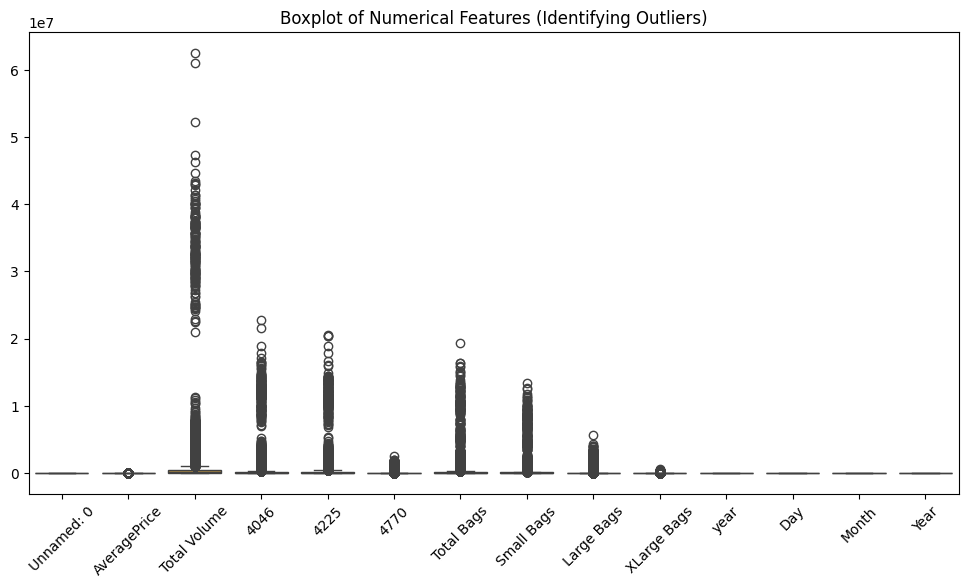

Outliers in column 'Unnamed: 0':
Series([], Name: Unnamed: 0, dtype: int64)

Outliers in column 'AveragePrice':
11314    2.58
11320    2.79
11321    2.66
11322    2.59
11323    2.74
         ... 
17433    2.56
17434    2.61
17514    2.52
17515    2.51
17568    2.50
Name: AveragePrice, Length: 209, dtype: float64

Outliers in column 'Total Volume':
312      5040365.47
313      4695737.21
314      5259354.30
315      5775536.27
316      4575710.62
            ...    
18220    1384683.41
18221    1336979.09
18222    1283987.65
18223    1476651.08
18224    1517332.70
Name: Total Volume, Length: 2297, dtype: float64

Outliers in column '4046':
52       292097.36
54       324932.28
55       283024.01
60       290457.50
66       346118.51
           ...    
9125     436282.38
11812    323883.65
11813    321733.20
11821    361996.84
11825    302561.47
Name: 4046, Length: 2518, dtype: float64

Outliers in column '4225':
104      394104.02
105      434590.82
106      399851.59
107      453586.50

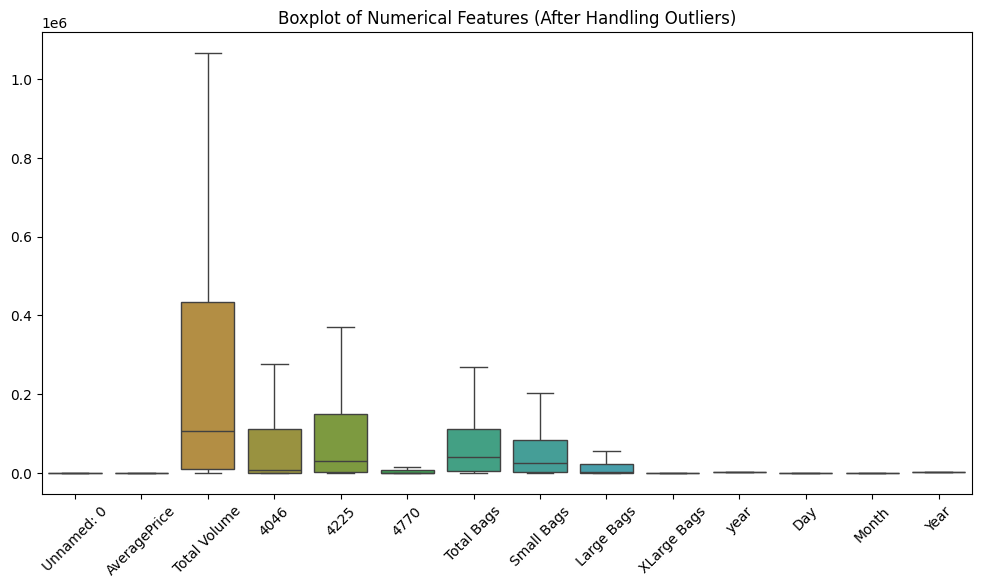

In [ ]:
# Visualize the spread of numerical data and identify outliers using boxplots
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (Identifying Outliers)")
sns.boxplot(data=numerical_data)
plt.xticks(rotation=45)
plt.show()

# Detect and display outliers for selected columns
for column in numerical_data:
    column_data = numerical_data[column]
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    print("Outliers in column '{}':".format(column))
    print(outliers)
    print()
    numerical_data[column] = np.where(numerical_data[column] < lower_bound, lower_bound, numerical_data[column])
    numerical_data[column] = np.where(numerical_data[column] > upper_bound, upper_bound, numerical_data[column])

# Examine spread of numerical data after handling outliers using boxplots
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
sns.boxplot(data=numerical_data)
plt.xticks(rotation=45)
plt.show()

This code plots distribution plots for each numerical feature in the DataFrame numerical_data_no_year. It includes only the columns specified in the columns_to_include list, which are 'AveragePrice', 'Total Volume', 'Day', 'Month', and 'Year'. For each column, it creates a histogram with a kernel density estimate (KDE) to visualize the distribution of values and their frequency.

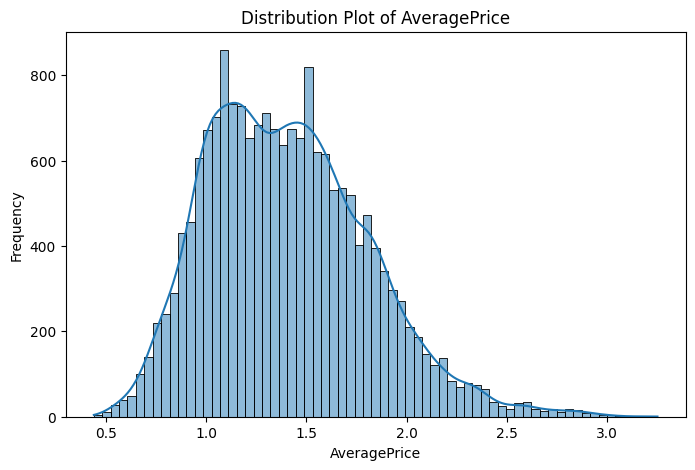

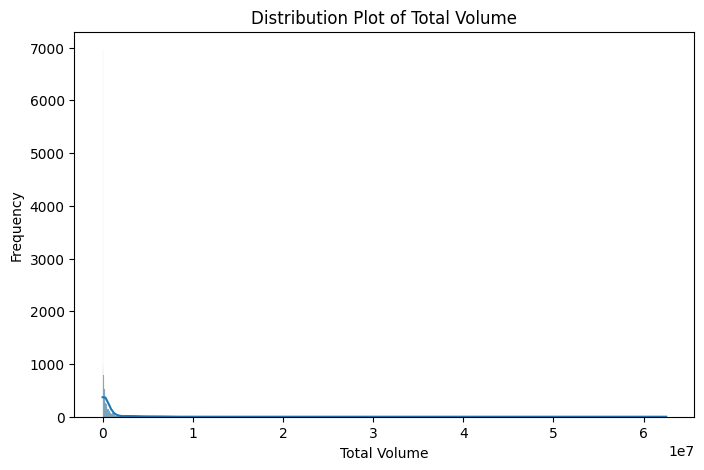

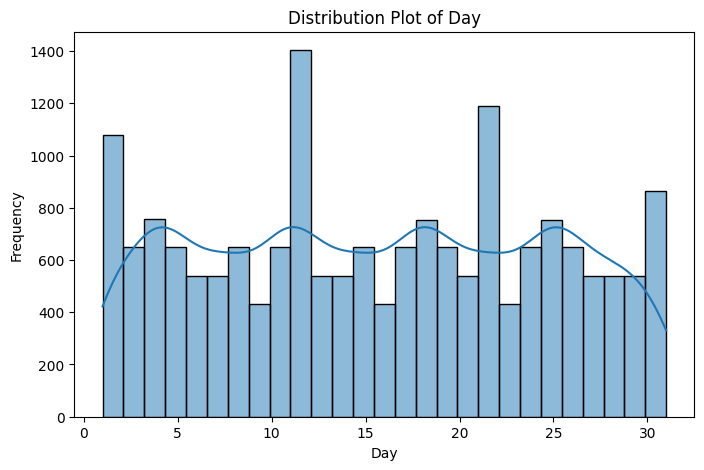

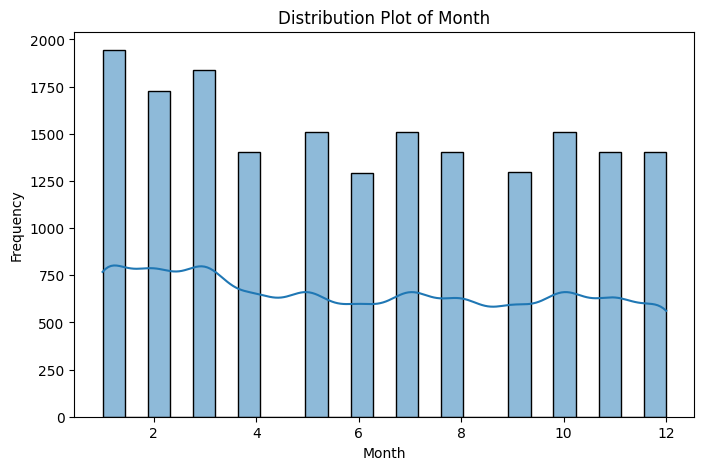

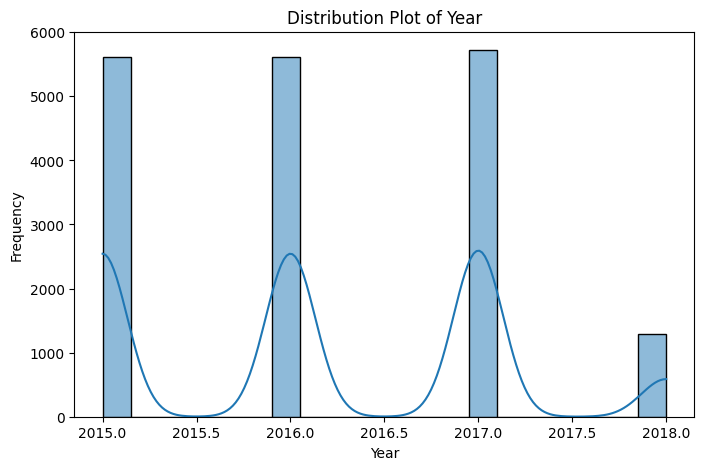

In [ ]:
# Include columns that are significant
columns_to_include = ['AveragePrice','Total Volume','Day','Month','Year']

# Plot distribution plots for each numerical feature
for col in numerical_data_no_year.columns:
    if col in columns_to_include:
        plt.figure(figsize=(8, 5))
        plt.title(f"Distribution Plot of {col}")
        sns.histplot(numerical_data_no_year[col], kde=True)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

This code compiles the dataset for writing the training and test data. It identifies the common columns between the encoded categorical data (encoded_data) and the numerical data (numerical_data). It then drops these common columns from the encoded data to avoid redundancy. Finally, it combines the numerical data and the modified encoded data into a single DataFrame called combined_data.

In [ ]:
# Compiling dataset to write the train and test data
common_columns = set(encoded_data.columns).intersection(set(numerical_data.columns))
# Drop common columns from encoded_data
encoded_data_no_common = encoded_data.drop(columns=common_columns)
# Combine the encoded dataset and the dataset with outliers handled
combined_data = pd.concat([numerical_data,encoded_data_no_common], axis=1)


This code splits the combined dataset (combined_data) into training and test datasets using the train_test_split function from scikit-learn. It specifies a test size of 20% and a random state of 42 for reproducibility. Then, it writes the training and test data to CSV files located in Google Drive. Finally, it prints the file paths where the data is saved.

In [ ]:
# Split the encoded data into training and test datasets
X_train, X_test = train_test_split(combined_data, test_size=0.2, random_state=42)

# Write the training data to a CSV file
train_file_path = "/content/drive/MyDrive/Dataset/Train_data_avocado.csv"
X_train.to_csv(train_file_path, index=False)
print("Training data saved to:", train_file_path)

# Write the test data to a CSV file
test_file_path = "/content/drive/MyDrive/Dataset/Test_data_avocado.csv"
X_test.to_csv(test_file_path, index=False)
print("Test data saved to:", test_file_path)

Training data saved to: /content/drive/MyDrive/Dataset/Train_data_avocado.csv
Test data saved to: /content/drive/MyDrive/Dataset/Test_data_avocado.csv


 What is the distribution of the 'AveragePrice' feature?

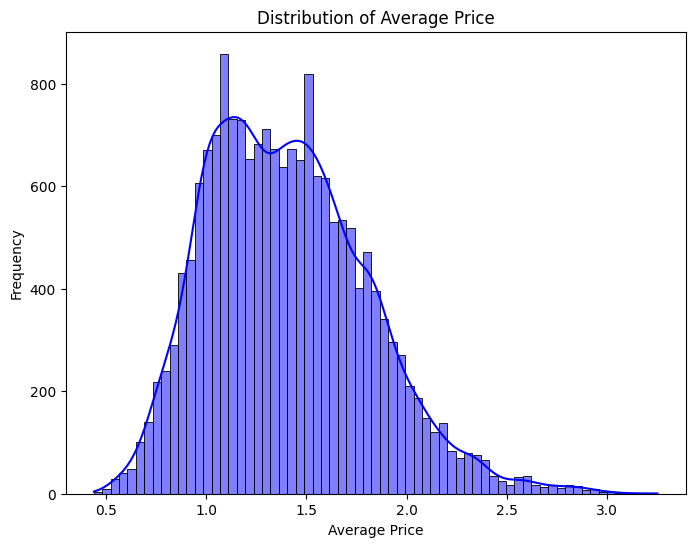

In [ ]:
#Q1 What is the distribution of the 'AveragePrice' feature?
plt.figure(figsize=(8, 6))
sns.histplot(df['AveragePrice'], kde=True, color='blue')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

How does the 'Total Volume' vary across different regions?

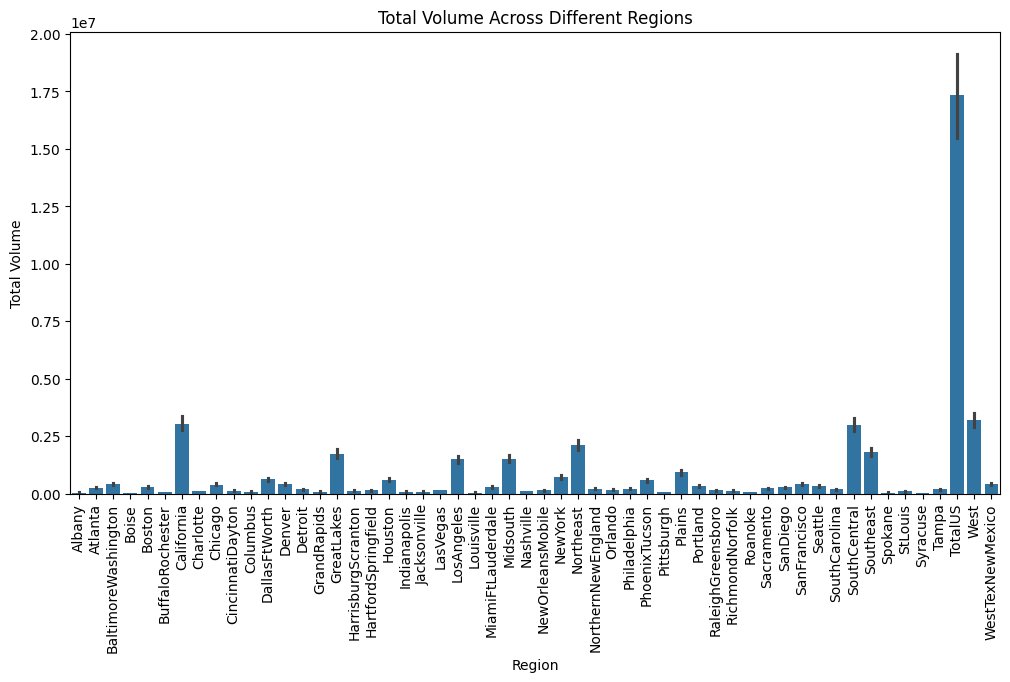

In [ ]:
#Q2 How does the 'Total Volume' vary across different regions?
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Total Volume', data=df)
plt.title('Total Volume Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

Is there a correlation between the 'AveragePrice' and 'Total Volume' features?

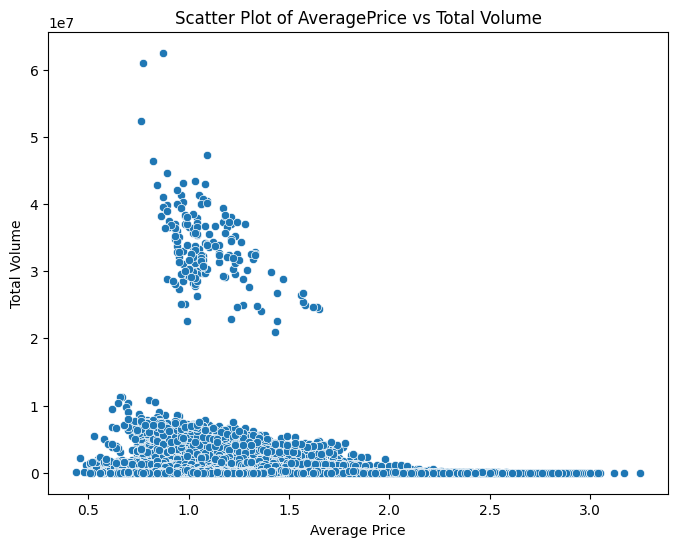

Correlation Coefficient between AveragePrice and Total Volume: -0.1927523871527191


In [ ]:
#Q3 Is there a correlation between the 'AveragePrice' and 'Total Volume' features?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AveragePrice', y='Total Volume', data=df)
plt.title('Scatter Plot of AveragePrice vs Total Volume')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')
plt.show()
correlation_coefficient = df['AveragePrice'].corr(df['Total Volume'])
print("Correlation Coefficient between AveragePrice and Total Volume:", correlation_coefficient)

How does the 'AveragePrice' change over the years?

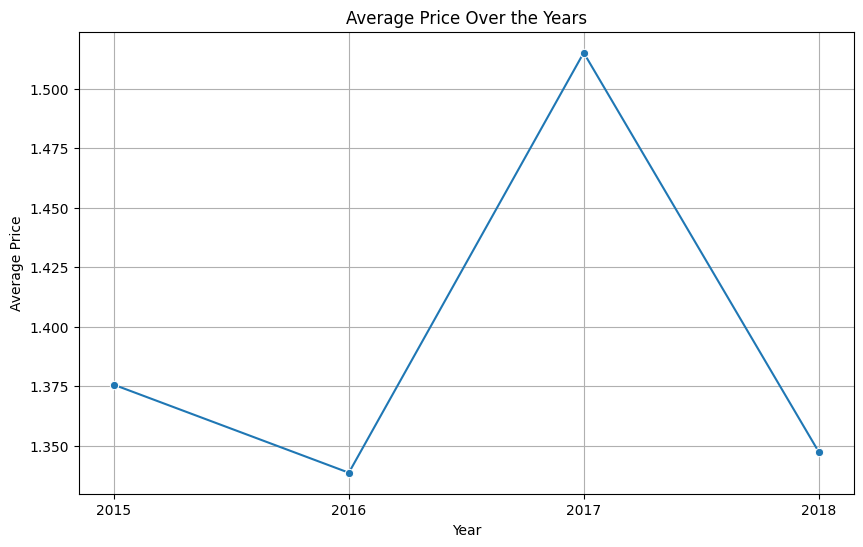

In [ ]:
#Q4 How does the 'AveragePrice' change over the years?
average_price_by_year = df.groupby('Year')['AveragePrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AveragePrice', data=average_price_by_year, marker='o')
plt.title('Average Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(average_price_by_year['Year'])
plt.grid(True)
plt.show()

Are there any noticeable patterns in the distribution of the numericall features?

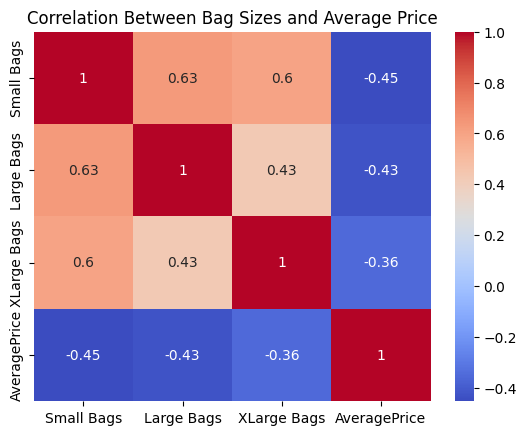

In [ ]:
#Q5 Are there any noticeable patterns in the distribution of the numericall features?
sns.heatmap(numerical_data[['Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Bag Sizes and Average Price')
plt.show()
